# null importance: feature selection

In [1]:
import pandas as pd
import numpy as np
import glob
import pickle as pkl
from models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def get_feature_importance(model):
    # return np.log1p(model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration))
    return model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration)

In [3]:
model_name = "lgb024_dart"

feature_importance_df = pd.DataFrame()
for i in range(6):
    part = pd.read_csv("./models/lgb024.csv")
    model = load_model("./models/{}_{}.pkl".format(model_name, i))

    part["fi"] = get_feature_importance(model)
    feature_importance_df = pd.concat([feature_importance_df, part], axis=0)

[info] load lgbmodel : ./models/lgb024_dart_0.pkl
[info] load lgbmodel : ./models/lgb024_dart_1.pkl
[info] load lgbmodel : ./models/lgb024_dart_2.pkl
[info] load lgbmodel : ./models/lgb024_dart_3.pkl
[info] load lgbmodel : ./models/lgb024_dart_4.pkl
[info] load lgbmodel : ./models/lgb024_dart_5.pkl


In [4]:
def load_lgb_if(model_name, nsplit, features_fn):
    feature_importance_df = pd.DataFrame()
    for i in range(nsplit):
        part = pd.read_csv(features_fn)
        model = load_model("./models/{}_{}.pkl".format(model_name, i))

        part["fi"] = get_feature_importance(model)
        feature_importance_df = pd.concat([feature_importance_df, part], axis=0)
    return feature_importance_df

In [5]:
nsplit = 6
features_fn = "./models/lgb024.csv"

fi024 = load_lgb_if("lgb024_dart", nsplit, features_fn)
fi024_null = load_lgb_if("lgb024_dart_null", nsplit, features_fn)

[info] load lgbmodel : ./models/lgb024_dart_0.pkl
[info] load lgbmodel : ./models/lgb024_dart_1.pkl
[info] load lgbmodel : ./models/lgb024_dart_2.pkl
[info] load lgbmodel : ./models/lgb024_dart_3.pkl
[info] load lgbmodel : ./models/lgb024_dart_4.pkl
[info] load lgbmodel : ./models/lgb024_dart_5.pkl
[info] load lgbmodel : ./models/lgb024_dart_null_0.pkl
[info] load lgbmodel : ./models/lgb024_dart_null_1.pkl
[info] load lgbmodel : ./models/lgb024_dart_null_2.pkl
[info] load lgbmodel : ./models/lgb024_dart_null_3.pkl
[info] load lgbmodel : ./models/lgb024_dart_null_4.pkl
[info] load lgbmodel : ./models/lgb024_dart_null_5.pkl


In [6]:
avg_fi_cmp = pd.DataFrame()
avg_fi_cmp["fi"] = fi024.groupby("feature_name").fi.mean()
avg_fi_cmp["fi_null"] = fi024_null.groupby("feature_name").fi.mean()
avg_fi_cmp["fi_complex"] = (avg_fi_cmp.fi + 1) / (avg_fi_cmp.fi_null + 1)

for col in avg_fi_cmp.columns:
    avg_fi_cmp[col] = np.log1p(avg_fi_cmp[col])

In [7]:
avg_fi_cmp.sort_values("fi_complex").tail(150).head(20)

,fi,fi_null,fi_complex
feature_name,,,
ratio_4_lag-8_monthly_pmax,6.068515,0.000000,6.070827
subsector_id_25_new_trans,6.090227,0.000000,6.092489
merchant_category_id_518_hist_trans,6.141092,0.000000,6.143243
sum_2_lag-5_monthly_merchant_pmax,9.887139,3.700697,6.188497
newk_hist_amount_month_ratio_var,10.802240,4.615653,6.188641
merchant_category_id_511_hist_trans,10.002280,3.792428,6.211859
purchase_hour_15_new_trans,6.218428,0.000000,6.220418
newk_hist_purchase_date_uptonow,11.883630,5.660688,6.224924
newk_feature_2,6.227426,0.000000,6.229398


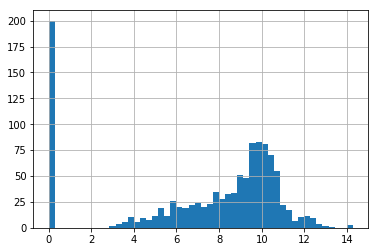

In [8]:
avg_fi_cmp.fi.hist(bins=50)

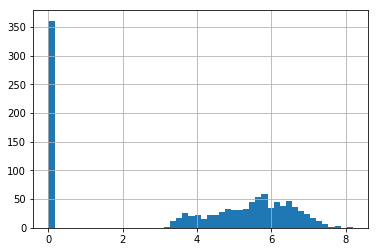

In [9]:
avg_fi_cmp.fi_null.hist(bins=50)

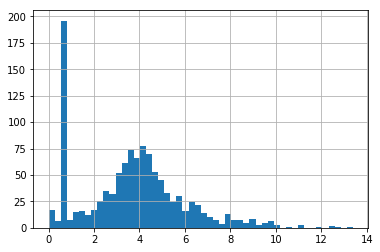

In [10]:
avg_fi_cmp.fi_complex.hist(bins=50)

In [11]:
avg_fi_cmp[avg_fi_cmp.fi_complex > 2].to_csv("./models/lgb025.csv")

In [17]:
avg_fi_cmp = avg_fi_cmp.reset_index()
avg_fi_cmp[avg_fi_cmp.feature_name.apply(lambda x: x.endswith("abs"))].sort_values("fi_complex")

,feature_name,fi,fi_null,fi_complex


In [16]:
avg_fi_cmp.sort_values("fi_complex").tail(100)

,fi,fi_null,fi_complex
feature_name,,,
sum_3_lag-10_monthly_merchant_avg_std,6.724606,0.000000,6.725806
merchant_category_id_703_hist_trans,6.724955,0.000000,6.726155
newk_new_month_lag_mean,12.548647,5.785717,6.764085
month_lag_-12_hist_trans,6.791892,0.000000,6.793014
newk_new_installments_max,6.793050,0.000000,6.794170
sum_4_lag-2_monthly_pmax,10.849602,4.050187,6.800529
newk_new_purchase_date_diff,13.035421,6.234161,6.802371
installments_max_new_trans,6.873908,0.000000,6.874942
newk_new_weekofyear_max,11.156920,4.262870,6.895064
